<a href="https://colab.research.google.com/github/avalenciacu/SYS-2025-2/blob/main/SYS-2025-2/punto4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Encuentre el espectro de Fourier, su parte real, imaginaria, magnitud, fase y el error relativo para
$n \in \{0, \pm1, \pm2, \pm3, \pm4, \pm5\}$,
a partir de $x''(t)$ para la señal $x(t)$ .
Compruebe el espectro obtenido con la estimación a partir de $x(t)$.
Presente las simulaciones de Python respectivas.


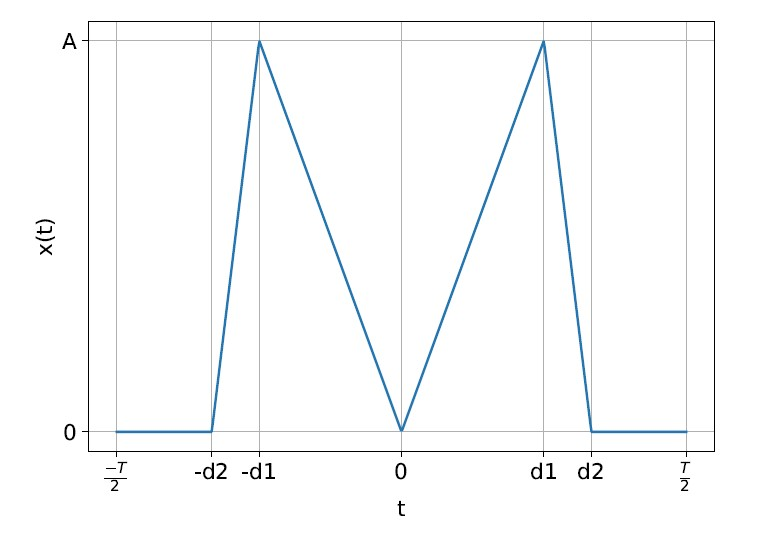




obtenemos las pendientes $m_1$ y $m_2$:

  \begin{align*}
    m_1 &= \frac{\Delta x}{\Delta t} = \frac{0-A}{-d_1-(-d_2)}=\frac{A}{d_2-d_1} \\
    m_2 &= \frac{\Delta x}{\Delta t} = \frac{A-0}{d1-0} =-\frac{A}{d_1}
  \end{align*}

$
x(t)=
\begin{cases}
0, & -\dfrac{T}{2} \le t < -d_2, \\[6pt]
\dfrac{A}{d_2 - d_1}\,(t + d_2), & -d_2 \le t < -d_1, \\[8pt]
-\dfrac{A}{d_1}\,t, & -d_1 \le t < 0, \\[8pt]
\dfrac{A}{d_1}\,t, & 0 \le t < d_1, \\[8pt]
-\dfrac{A}{d_2 - d_1}\,(t - d_2), & d_1 \le t < d_2, \\[8pt]
0, & d_2 \le t < \dfrac{T}{2}.
\end{cases}
$


$
x(t)=
\begin{cases}
0, & -\dfrac{T}{2} \le t < -d_2, \\[6pt]
m_1(t + d_2), & -d_2 \le t < -d_1, \\[8pt]
m_2t, & -d_1 \le t < 0, \\[8pt]
-m_2t, & 0 \le t < d_1, \\[8pt]
-m_1(t - d_2), & d_1 \le t < d_2, \\[8pt]
0, & d_2 \le t < \dfrac{T}{2}.
\end{cases}
$


CODIGO EJERCICIO 4

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parámetros de la señal
A = 1      # Amplitud
d1 = 3     # Ancho de la zona intermedia
d2 = 4     # Punto donde termina la rampa
T = 12      # Período total

# Pendientes de las rampas
m1 = A / (d2 - d1)
m2 = -(A / d1)

# Dominio temporal
t = np.linspace(-T/2, T/2, 2000)

# Definición de la señal por tramos
x = np.piecewise(t,
                 [
                     (t >= -T/2) & (t < -d2),
                     (t >= -d2) & (t < -d1),
                     (t >= -d1) & (t < 0),
                     (t >= 0) & (t < d1),
                     (t >= d1) & (t < d2),
                     (t >= d2) & (t <= T/2)
                 ],
                 [
                     0,
                     lambda t:  m1 * (t + d2),
                     lambda t:  m2 * t,
                     lambda t: -m2 * t,
                     lambda t: -m1 * (t - d2),
                     0
                 ])
# Arreglos para almacenar los valores reconstruidos (aceptan números complejos)
re1 = np.zeros(len(t), dtype=complex)  # Reconstrucción directa
re2 = np.zeros(len(t), dtype=complex)  # Reconstrucción con derivada
re3 = np.zeros(len(t), dtype=complex)  # Otra reconstrucción con derivada

# Función de reconstrucción directa
def recos1(ti, N, T):
    """
    Reconstruye la señal usando la serie compleja de Fourier hasta el orden N.

    Parameters:
    ti (float): Tiempo actual donde se evalúa la señal
    N (int): Número máximo de armónicos
    T (float): Período de la señal

    Returns:
    complex: Valor reconstruido en el instante ti
    """
    suma = 0
    omega = (2 * np.pi) / T  # Frecuencia angular fundamental
    for i in range(N + 1):
        if i != 0:
            # Coeficiente Cn multiplicado por exponencial compleja
            integrando = x * np.exp(-1j * i * omega * t)
            cn = (2 / T) * np.trapezoid(integrando, t)
            suma += cn * np.exp(1j * i * omega * ti)
        else:
            # Término constante (C0)
            suma += (1 / T) * np.trapezoid(x, t)
    return suma

# Función de reconstrucción usando la segunda derivada

def recos2(ti, N, T, d1, d2, A):
    """
    Reconstrucción usando coeficientes de la segunda derivada para una señal par.
    """
    suma = 0
    omega = (2 * np.pi) / T
    for n in range(1, N + 1):
        cn = (4 * A / ((d2 - d1) * T * (omega * n)**2)) * (np.cos(n * omega * d1) - np.cos(n * omega * d2))
        suma += 2 * cn * np.cos(n * omega * ti)  # señal par → solo cosenos
    c0 = (1 / T) * np.trapz(x, t)  # término DC
    suma += c0
    return suma



# Reconstrucción punto a punto
for i in range(len(t)):
    re1[i] = recos1(t[i], 10, T)  # Reconstrucción con 5 términos (0 a 4)
for i in range(len(t)):
    re2[i] = recos2(t[i], 10, T, d1, d2, A)  # Reconstrucción con 6 términos (0 a 5)
# for i in range(len(t)):
#     re3[i] = recos2(t[i], 1, T, d1, d2, -A)  # Reconstrucción con 2 términos (0 a 1)

# Gráfica de resultados
plt.figure(figsize=(10, 6))
plt.plot(t, x, color=(0.0588, 0.1843, 0.9804), label='Señal original')
plt.plot(t, re1.real, color=(0, 0.5, 0), label='Reconstrucción directa (N=4)')



plt.plot(t, re2.real, color=(0.9804, 0.1059, 0.1882), label='Reconstrucción derivada (N=5)')
#plt.plot(t, re3.real, color=(0,0,0), label='Reconstrucción derivada (N=1)')
plt.title('Reconstrucciones de la señal usando Serie Compleja de Fourier')
plt.xlabel('Tiempo (t)')
plt.ylabel('Amplitud')
plt.legend()
plt.grid(color=(0.0157, 0.0431, 0.2314))
plt.tight_layout()
plt.show()

In [ ]:
#@title Cálculo del espectro:

#  Calcular término constante c₀
c0 = (1 / T) * np.trapezoid(x, t)

N_max = 5   # Número máximo de armónicos a graficar
#  Vector de armónicos n ∈ [-N_max, ..., 0, ..., N_max]
nv = np.arange(-N_max, N_max + 1)

# Frecuencia angular fundamental
omega0 = (2 * np.pi) / T

# Calcular coeficientes de Fourier usando segunda derivada
Cn = np.zeros_like(nv, dtype=np.complex128)

non_zero_mask = nv != 0  # Evitar división por cero
Cn[non_zero_mask] = (2j / (T * nv[non_zero_mask]**2 * omega0**2)) * \
                    (np.sin(nv[non_zero_mask] * omega0 * d1) - np.sin(nv[non_zero_mask] * omega0 * d2))

# Asignar valor medio en n=0
Cn[nv == 0] = c0

# Gráfica del espectro
plt.figure(figsize=(7, 3))
plt.stem(nv, np.abs(Cn))
plt.title("Espectro de Magnitud |cₙ| usando segunda derivada")
plt.xlabel("n (armónico)")
plt.ylabel("|cₙ|")
plt.grid(True)
plt.axhline(0, color='black', linewidth=0.8)
plt.xticks(nv)
plt.tight_layout()
plt.show()

In [ ]:
# @title graficar espectro

# Gráfico del espectro en formato de matriz 2x2
fig = plt.figure(figsize=(7, 6))

# === Fila 1: Parte real e imaginaria ===

# Parte real
ax1 = fig.add_subplot(2, 2, 1)
ax1.stem(nv.astype(float), np.real(Cn).astype(float), 'r', basefmt=" ")
ax1.set_title(r'Parte Real', fontsize=14)
ax1.set_xlabel(r'', fontsize=12)
ax1.set_ylabel(r'', fontsize=12)
ax1.grid(True)
ax1.axhline(0, color='black', lw=0.8)
ax1.set_xticks(nv)

# Parte imaginaria
ax2 = fig.add_subplot(2, 2, 2)
ax2.stem(nv.astype(float), np.imag(Cn).astype(float), 'r', basefmt=" ")
ax2.set_title(r'Parte Imaginaria', fontsize=14)
ax2.set_xlabel(r'', fontsize=12)
ax2.set_ylabel(r'', fontsize=12)
ax2.grid(True)
ax2.axhline(0, color='black', lw=0.8)
ax2.set_xticks(nv)

# Ajustar espaciado entre subplots
fig.tight_layout()
plt.show()